<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_07/class_007_image_processing_blood_cells_000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [31]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, BatchNormalization, ZeroPadding2D, MaxPool2D, Activation, add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import zipfile


In [32]:
IMAGE_SIZE = [224,224]
epochs = 16
batch_size = 128

In [33]:
!gdown 1CU4UkqJae07u1tKfp2rajWwwZA0SKiIm

Downloading...
From: https://drive.google.com/uc?id=1CU4UkqJae07u1tKfp2rajWwwZA0SKiIm
To: /content/blood_cell_images.zip
100% 110M/110M [00:00<00:00, 275MB/s] 


In [34]:
FILE='blood_cell_images.zip'

In [35]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [36]:
!ls

blood_cell_images  blood_cell_images.zip  __MACOSX  sample_data


In [48]:
train_path = 'blood_cell_images/TRAIN'
test_path = 'blood_cell_images/TEST'
images_test = glob(test_path + '/*/*.jp*g')
images_train = glob(train_path + '/*/*.jp*g')

In [49]:
folders_train = glob(train_path + '/*')
folders_test = glob(test_path + '/*')

In [50]:
folders_train

['blood_cell_images/TRAIN/NEUTROPHIL',
 'blood_cell_images/TRAIN/EOSINOPHIL',
 'blood_cell_images/TRAIN/MONOCYTE',
 'blood_cell_images/TRAIN/LYMPHOCYTE']

In [51]:
folders_test

['blood_cell_images/TEST/NEUTROPHIL',
 'blood_cell_images/TEST/EOSINOPHIL',
 'blood_cell_images/TEST/MONOCYTE',
 'blood_cell_images/TEST/LYMPHOCYTE']

In [52]:
ntrain, ntest = len(images_train),len(images_test)
ntrain,ntest

(9957, 2487)

In [53]:
images_train

['blood_cell_images/TRAIN/NEUTROPHIL/_10_7945.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_7_8567.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_138_7892.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_8_3340.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_137_6744.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_89_127.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_73_3661.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_45_9077.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_58_2491.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_118_9128.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_33_3819.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_109_5310.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_2_9371.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_109_3160.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_127_4508.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_132_5577.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_157_4343.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_101_7927.jpeg',
 'blood_cell_images/TRAIN/NEUTROPHIL/_34_

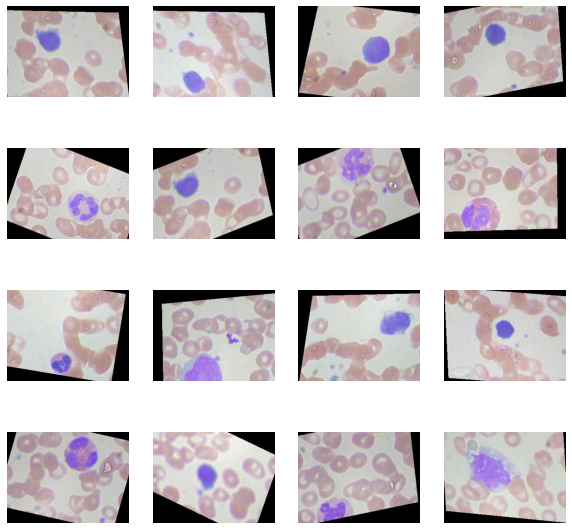

In [54]:
plt.figure(figsize=(10, 10))

for i in range(16): 
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image.load_img(np.random.choice(images_train)))
  plt.axis("off")